In [25]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import mean_squared_error

# 1. Eigenvalues and Eigenvectors

In [8]:
# (4) Using np.linalg.eig, compute the eigenvalues and eigenvectors of A
# print your results [print()]
# TODO

# Define a matrix
matrix = np.array([[9, 1, -1], [-1, 11, 1], [-2, 2, 10]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [12.  8. 10.]
Eigenvectors:
 [[ 9.00258517e-16 -7.07106781e-01 -7.07106781e-01]
 [-7.07106781e-01 -3.36518470e-16 -7.07106781e-01]
 [-7.07106781e-01 -7.07106781e-01 -5.62025848e-15]]


# 2. Principal Component analysis and eigenfaces

In [3]:
dataset = fetch_olivetti_faces()

persons_faces = []
for i in range(40):
    faces = []
    for j in range(10):
        faces += [dataset.images[i*10+j]]
    persons_faces += [faces]

database = [faces[:-1] for faces in persons_faces[:36]]
test_faces = [faces[-1] for faces in persons_faces[:36]]
people_not_in_database = [face for faces in persons_faces[36:] for face in faces]

In [4]:
# TODO
# How many face images are in the database
# How many images are in the list of test faces?
# How many images of people not in the database are available?
# What is the dimension of each face image?

In [ ]:
# display faces from the database of faces -> 9 faces of 5 different people
fig, axes = plt.subplots(5, 9, figsize=(10,5))
for i in range(5):
    for j in range(9):
        axes[i,j].imshow(database[i][j], cmap="gray")
        axes[i,j].set_xticks([]);
        axes[i,j].set_yticks([]);

In [ ]:
# display test faces for the first 5 people in the database
fig, axes = plt.subplots(1, 5, figsize=(10,5))
for i in range(5):
        axes[i].imshow(test_faces[i], cmap="gray")
        axes[i].set_xticks([]);
        axes[i].set_yticks([]);

In [ ]:
# display faces of 10 people who are not in the database
fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i in range(10):
        j = random.randint(0,39)
        axes[i//5 , i%5].imshow(people_not_in_database[j], cmap="gray")
        axes[i//5 , i%5].set_xticks([]);
        axes[i//5 , i%5].set_yticks([]);

In [8]:
# TODO
# Create a matrix T containing all faces in the database, such that each row corresponds to 
# the pixels of a person's face. Note the height of this matrix should be equal to the number of
# faces in the database.


In [9]:
# Obtain the mean face
# TODO

In [10]:
# Subtract the mean face from all faces in the database
# TODO

In [11]:
# Obtain the covariance matrix
# TODO

In [12]:
# obtain the eigenfaces, the eigenfaces are the eigenvectors of the covariance matrix
# TODO

In [13]:
# Computing the eigenvalues and eigenvectors as done above is computationally expensive
# How would you compute the eigenvalues and vectors more efficiently
# TODO

In [14]:
# Display the eigenface that captures the most variance in the faces in the database
# compared that obtained using the computationally efficient method and the one obtained from the matrix S
# TODO

In [15]:
# select the top eigenfaces that just capture 90% of the variance in the database, not below 90%
# TODO

In [16]:
# The obtained eigenfaces can be used to represent all faces. We can represent each face as a linear combination of the eigenfaces
# This means that we can obtain coordinates of faces with respect to the eigenfaces.
# obtain the cordinates of the images in the database with respect to the eigenfaces.
# Obtain the coordinates of the faces in the eigenfaces subspace
# TODO

In [17]:
# Now given a new image, you can recognize it as a face similar to those in the database.
# To do this, you first project the new face onto the eigenfaces subspace and obtain its coordinates.
# Then compare it's distance to the coordinates of the faces in the database.

# Design a face recognition system
# that is capable of recognizing faces in the database. 

# [A test face is recognized as being similar to face in the database if the minimum distance between the 
# test face and all faces in the database is below a threshold]

# Identify a threshold such that the accuracy of your system is greater than 80%
# TODO


In [18]:
# Conduct experiments to assess the impact of different parameters and
# settings on your face recognition system.
# TODO

# 3. Image Compression

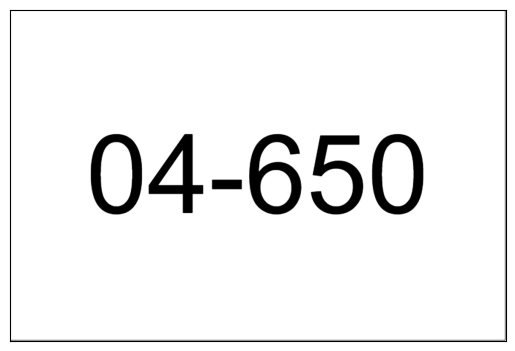

In [9]:
img = np.array(plt.imread("./04-650.jpg")[:,:,0], dtype=float)
plt.imshow(img, cmap="gray")
plt.xticks([]); plt.yticks([]);

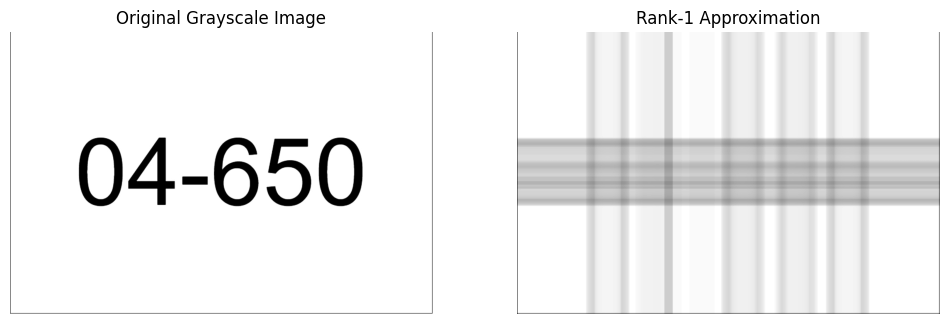

In [10]:
# Obtain the SVD decomposition of the image
# And display the rank-1 matrix for the largest singular value
# TODO


# Perform SVD
U, S, V_Transpose = np.linalg.svd(img, full_matrices=False)

# Reconstruct the rank-1 approximation
rank_1_matrix = np.outer(U[:, 0], V_Transpose[0]) * S[0]

# Plot the original grayscale image and the rank-1 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_1_matrix, cmap='gray')
axes[1].set_title('Rank-1 Approximation')
axes[1].axis('off')

plt.show()

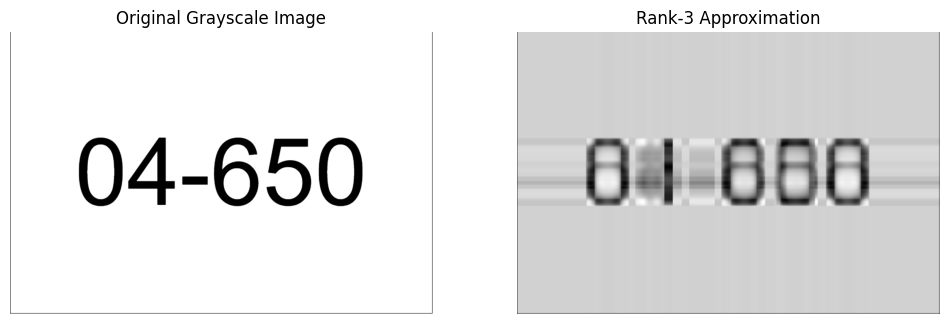

In [13]:
# Add up the rank-1 matrices for the top 3 singular values and display
# your result.
# What do you observe?
# TODO 

# Reconstruct the rank-1 matrices for the top 3 singular values
rank_1_matrix_1 = np.outer(U[:, 0], V_Transpose[0]) * S[0]
rank_1_matrix_2 = np.outer(U[:, 1], V_Transpose[1]) * S[1]
rank_1_matrix_3 = np.outer(U[:, 2], V_Transpose[2]) * S[2]

# Sum the rank-1 matrices
rank_3_matrix = rank_1_matrix_1 + rank_1_matrix_2 + rank_1_matrix_3

# Plot the original grayscale image and the rank-3 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_3_matrix, cmap='gray')
axes[1].set_title('Rank-3 Approximation')
axes[1].axis('off')

plt.show()

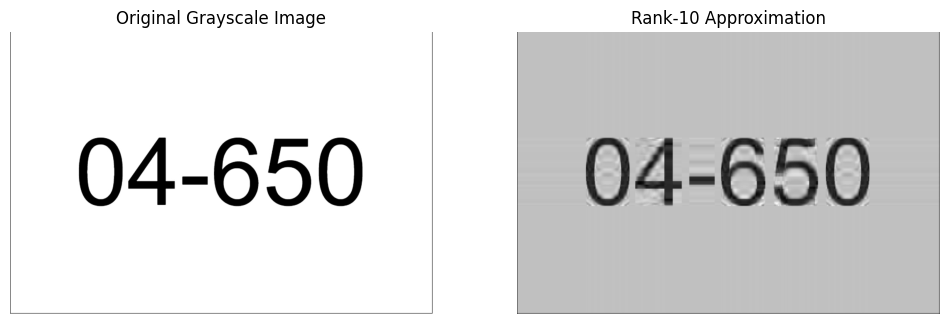

In [16]:
# Add up the rank-1 matrices for the top 10 singular values and display
# your result.
# What do you observe?
# TODO 
rank_1_matrix_4 = np.outer(U[:, 3], V_Transpose[3]) * S[3]
rank_1_matrix_5 = np.outer(U[:, 4], V_Transpose[4]) * S[4]
rank_1_matrix_6 = np.outer(U[:, 5], V_Transpose[5]) * S[5]
rank_1_matrix_7 = np.outer(U[:, 6], V_Transpose[6]) * S[6]
rank_1_matrix_8 = np.outer(U[:, 7], V_Transpose[7]) * S[7]
rank_1_matrix_9 = np.outer(U[:, 8], V_Transpose[8]) * S[8]
rank_1_matrix_10 = np.outer(U[:, 9], V_Transpose[9]) * S[9]

# Sum the rank-1 matrices
rank_10_matrix = rank_1_matrix_1 + rank_1_matrix_2 + rank_1_matrix_3 + rank_1_matrix_4 + rank_1_matrix_5 + rank_1_matrix_6 + rank_1_matrix_7 + rank_1_matrix_8 + rank_1_matrix_9 + rank_1_matrix_10

# Plot the original grayscale image and the rank-10 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_10_matrix, cmap='gray')
axes[1].set_title('Rank-10 Approximation')
axes[1].axis('off')

plt.show()

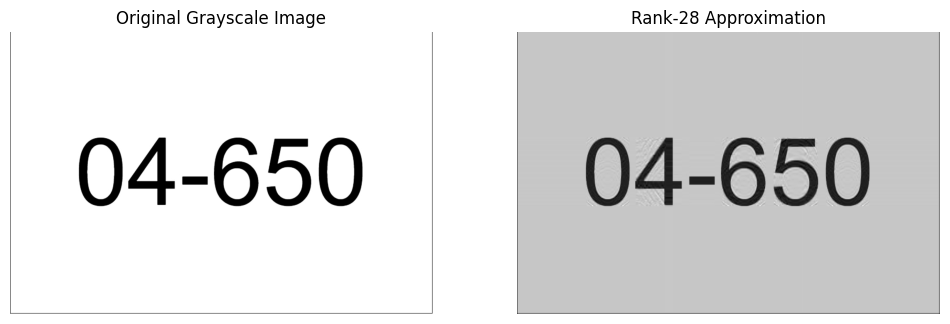

In [19]:
# What is the dimension of the image?
# Assuming 1byte of memory is required to store one element of the image matrix
# determine the topk  rank-1 matrices required to represent the image if a compression
# ratio of 13:1 is desired.
# TODO

# Initialize the rank-28 approximation matrix
rank_28_matrix = np.zeros_like(img, dtype=float)

# Sum the rank-1 matrices for the top 28 singular values
for i in range(28):
    rank_1_matrix_i = np.outer(U[:, i], V_Transpose[i]) * S[i]
    rank_28_matrix += rank_1_matrix_i

# Plot the original grayscale image and the rank-28 approximation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(rank_28_matrix, cmap='gray')
axes[1].set_title('Rank-28 Approximation')
axes[1].axis('off')

plt.show()

# 4. Linear Regression

In [37]:
class LinearRegressorSVD():
    def __init__(self, A, b):
        ## Remember the equation Ax = b, where A is input data, our goal is to solve for the coeficients x
        b = np.array(b).reshape((len(b),1))
        self.A = A
        self.b = b
        # Setting an initial value for the coefficients matrix
        self.coefficients = np.empty((A.shape[1]))
        
    def train(self):
        "Computes the coefficients based on the dataset received by the model"
        #TODO: Train the model based on the data passed using SVD 
        self.coefficients = np.linalg.pinv(self.A) @ self.b
        return self.coefficients
        
    def predict(self, input):
        "Returns a prediction based on the learnt model and using the parameter passed"
        #TODO: Returns the prediction based on the learnt coefficient
        return np.dot(input, self.coefficients)
        

    def getError(self, preds, targets):
        # TODO compute and return the mean squared error of predicted inputs and actual label
        return mean_squared_error(targets, preds)
       
    


# SIZE OF THE DATASET

In [29]:
dataset = pd.read_csv('housing.csv', header=None)
# SIZE OF THE DATASET - ROWS x COLUMNS
print("Size of the dataset: ", dataset.shape)
# DISPLAY THE FIRST FEW ROWS OF THE DATASET
print("First few rows of the dataset: \n", dataset.head())

Size of the dataset:  (489, 4)
First few rows of the dataset: 
        0     1     2         3
0  6.575  4.98  15.3  504000.0
1  6.421  9.14  17.8  453600.0
2  7.185  4.03  17.8  728700.0
3  6.998  2.94  18.7  701400.0
4  7.147  5.33  18.7  760200.0


In [38]:
# In our dataset, the last column represent the y value that we are looking for.
# Separate the X from the y

# Retrieve the features into the X array, and the output to the y array
X = dataset[[0,1,2]].to_numpy()
y = dataset[3].to_numpy()

# Data processing.
# By analyzing the dataset, we realize that our y values are in the order of 100,000. This can lead to numerical instability
# so we first scale it. Note that our model will predict result that we will need to scale back in reallife.
y =  y/100000
len(y)

# Looking at the values in the features as well, their multiplication can also lead to numerical instability.
# In this case, we will apply what is called a min-max normalization. Read about it here https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)
#TODO: Apply min-max normalization on each of the columns of the X array

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.dtype

dtype('float64')

Coefficients:  [[ 9.50068071]
 [-1.29862203]
 [-0.56460349]]
Mean squared error for training data:  1.1849172161729788


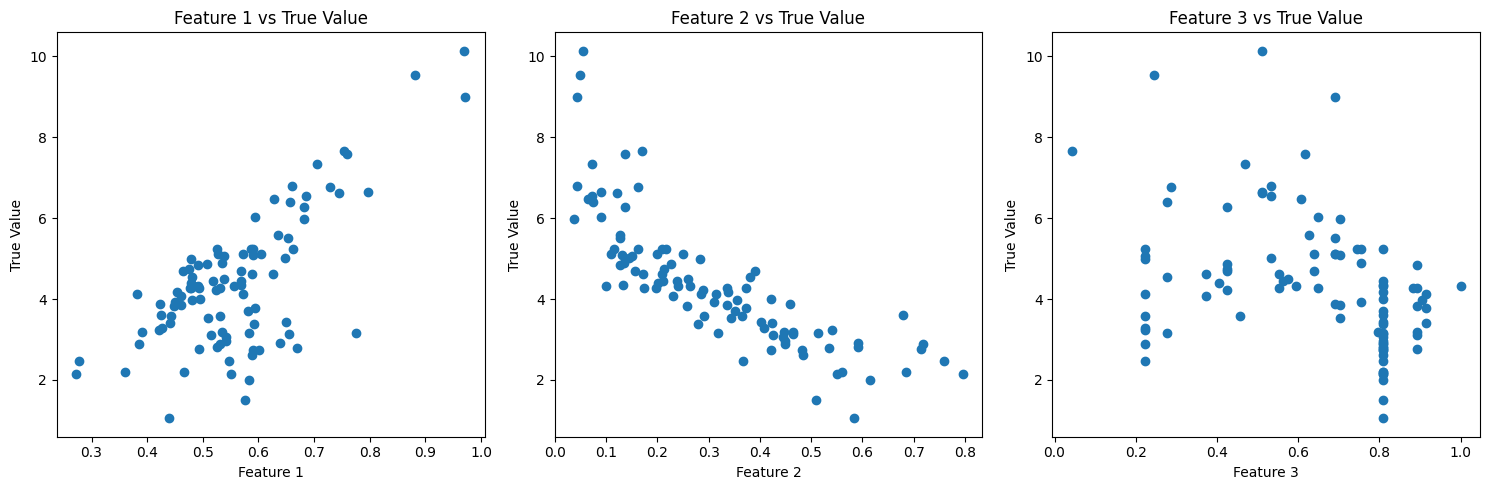

In [39]:
# In real-life training a model requires a training and testing dataset.
# In this stage, we will randomly generate the two datasets using 80% for the training dataset
# and 20% for the testing dataset. We use the train_test_split function for this

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Now that we have our datasets ready, we can start with the training process

lr = LinearRegressorSVD(X_train, y_train)
# TODO train the model
lr.train()

print("Coefficients: ", lr.coefficients)

##TODO print the mean square error for both training data
print("Mean squared error for training data: ", lr.getError(lr.predict(X_train), y_train))

# Now we can test our model
#TODO: Make a prediction using the test dataset
predictions = lr.predict(X_test)

# Visualization
#TODO: Create three plots. Using the test dataset, do a scatter plot of the i-th feature (X_i) against the true value y.
#Your code goes here

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot each feature against the true value y
for i in range(3):
    axs[i].scatter(X_test[:, i], y_test)
    axs[i].set_title(f'Feature {i+1} vs True Value')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('True Value')

# Display the plots
plt.tight_layout()
plt.show()

#TODO: Make a scattered plot of the predicted values, on the same figure, plot the actuall values.
